          date          county         state   fips   cases  deaths  \
0   10/16/2022           Adams  Pennsylvania  42001   29031     395   
1   10/16/2022       Allegheny  Pennsylvania  42003  320559    3567   
2   10/16/2022       Armstrong  Pennsylvania  42005   17323     372   
3   10/16/2022          Beaver  Pennsylvania  42007   46424     781   
4   10/16/2022           Berks  Pennsylvania  42011  117909    1672   
5   10/16/2022           Blair  Pennsylvania  42013   33375     651   
6   10/16/2022           Bucks  Pennsylvania  42017  144754    2028   
7   10/16/2022          Butler  Pennsylvania  42019   52019     791   
8   10/16/2022         Cambria  Pennsylvania  42021   40562     772   
9   10/16/2022          Carbon  Pennsylvania  42025   18563     316   
10  10/16/2022          Centre  Pennsylvania  42027   41491     373   
11  10/16/2022         Chester  Pennsylvania  42029  109929    1240   
12  10/16/2022      Clearfield  Pennsylvania  42033   22502     374   
13  10

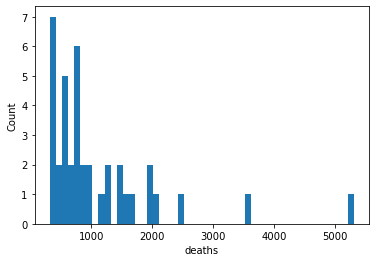

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import random
import statsmodels.api as sm

file='us-counties-2022.csv'
dat=pd.read_csv(file, header=0)
print(dat)


plt.figure(1)
deaths=np.array(dat['deaths'])
plt.hist(deaths, bins=50);
plt.xlabel("deaths");
plt.ylabel("Count");


# plt.figure(2)
# plt.hist(t, bins = 100);
# plt.xlabel("t statistic");
# plt.ylabel("count");




In [2]:
file='Poverty Pennsylvania.csv'
dat=pd.read_csv(file, header=0)
# print(dat)
shape=dat.shape[1]
# print(shape)
numcounties = int((shape-1)/6)
# print(numcounties)

pop=np.zeros(numcounties)
male=np.zeros(numcounties)
pov=np.zeros(numcounties)
counties=list(np.zeros(numcounties))
# print(pov)


# Extract the total population of both males and females within the 39 counties of Pennsylvania that are considered in poverty.
# Extract male populaion considered poverty level.
# Extract population percentage considered to be in poverty for each of 39 counties listed in Pennsylvania.
# Extract each column header (county name)

for i in range(numcounties):
    print(i)
    pop[i]=np.array(dat.iloc[0][1+6*i].replace(',',''))
    
    male[i]=np.array(dat.iloc[2][1+6*i].replace(',',''))
   
    pov[i]=np.array(dat.iloc[0][5+6*i].replace(',','').replace('%',''))
    
    counties[i]=(dat.columns[1+6*i].split(' ')[0])
    
#     female[i]=np.array(pop[i]-male[i])
    
# print(pov)
# print(male)
# print(pop)
# print(counties)
# print(female)

dat['male'].loc[dat['male']<6]=0
dat['male'].loc[dat['male']>=6]=1
dat['pov'].loc[dat['pov']<3.4]=0
dat['pov'].loc[dat['pov']>=3.4]=1

print(dat)

cyl = np.array(dat['cyl'])
wt  = np.array(dat['wt'])
mpg = np.array(dat['mpg'])
         
X = np.c_[np.ones(32),cyl,wt]
from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))
temp=np.matmul(tmp,np.transpose(X))
INTERCEPT, SLOPE, SLOPE2 = np.matmul(temp,mpg)
print(INTERCEPT, SLOPE, SLOPE2)

model=sm.OLS(mpg,X).fit()
print(model.summary())
# INTERCEPT, SLOPE, SLOPE2 = tmp @ np.transpose(X) @ mpg

print(stats.ttest_1samp(pop,0))
print(stats.ttest_1samp(pov,0))
print(stats.ttest_ind(pop,pov))

# plt.figure(1)
# plt.hist(pov, bins=50);
# plt.xlabel("Percent Below Poverty Level %");
# plt.ylabel("Count");


0


NameError: name 'female' is not defined

In [ ]:
file='Poverty Allegheny County.csv'
dat=pd.read_csv(file, header=0)
# print(dat)

male=np.array(dat.iloc[12][1])
female=np.array(dat.iloc[13][1])
print(male)
print(female)

male=(male/(male+female)*100)
female=(female/(male+female)*100)
print(male)
print(female)